In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

import warnings 
warnings.filterwarnings('ignore')

from pathlib import Path 
data_path = Path('data')

%matplotlib  inline

In [4]:
data = pd.read_csv(data_path / 'house.csv')
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [6]:
data.shape

(4600, 18)

Grafico de lineas

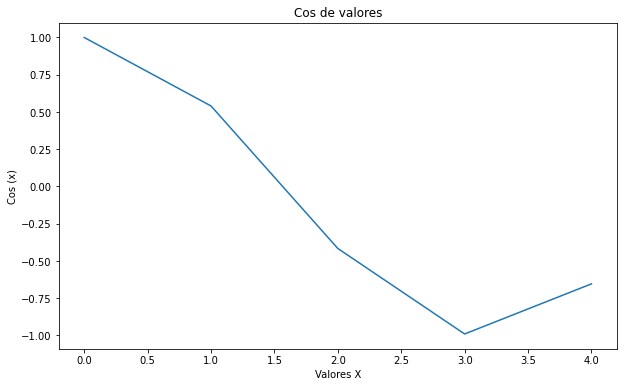

In [10]:
fig, ax = plt.subplots(figsize = (10,6))

x = np.arange(5)
y = np.cos(x)

ax.plot(x,y)
#Para modificar la grafica.
ax.set(xlabel='Valores X', ylabel='Cos (x)', title='Cos de valores');
#Si añadimos un punto y coma al final desaparecen los textos de abajo.



Grafico de barras.

In [12]:
num_bedrooms = data['bedrooms'].value_counts()
num_bedrooms

3.0    2032
4.0    1531
2.0     566
5.0     353
6.0      61
1.0      38
7.0      14
8.0       2
0.0       2
9.0       1
Name: bedrooms, dtype: int64

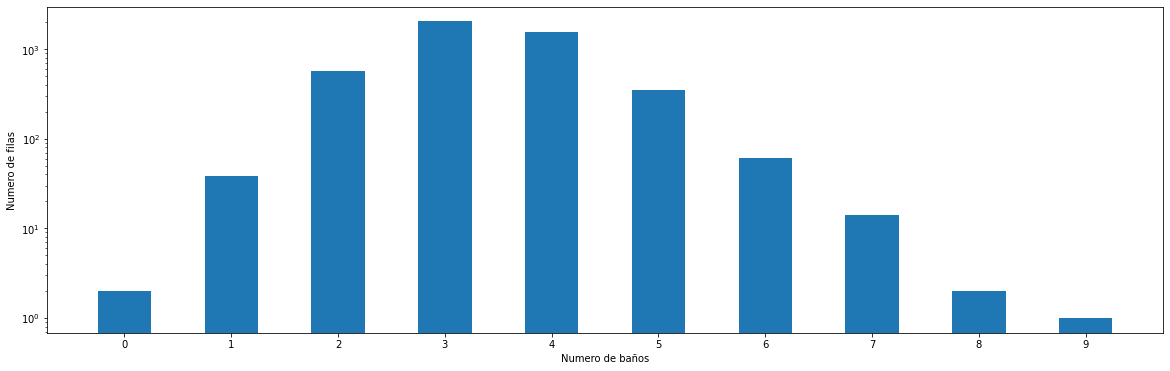

In [16]:
fig, ax = plt.subplots(figsize = (20,6))

ax.bar(x=num_bedrooms.index.values, height=num_bedrooms.values, width=0.5, align='center')
#Cogemos como eje x el indice, como altura los valores, le damos un ancho y que estén en medio.
#Podemos modificar la escala del eje y:
ax.set_yscale('log')
#Añadimos etiquetas:
ax.set_xlabel('Numero de baños')
ax.set_ylabel('Numero de filas')
#Modificamos los valores del eje X con:
ax.set_xticks(num_bedrooms.index.values);

Histograma

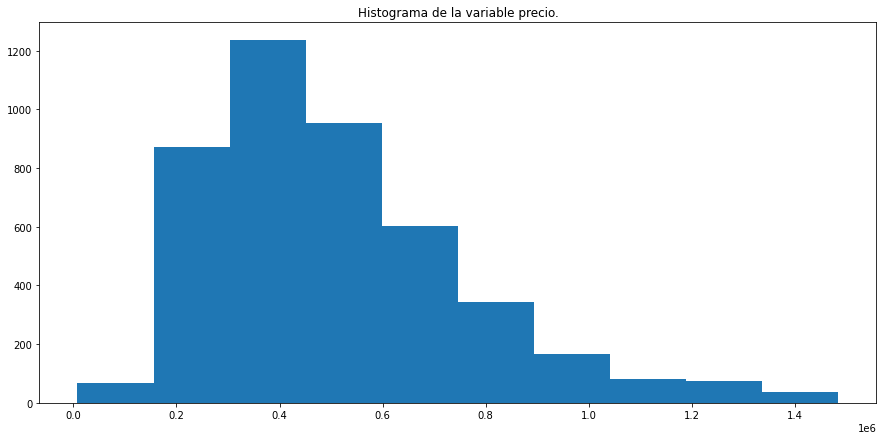

In [20]:
price = data.query('price > 0 and price < 1_500_000')['price']

fig, ax = plt.subplots(figsize=(15,7))
ax.hist(price, bins=10);
ax.set_title('Histograma de la variable precio.');


Grafico de puntos

In [24]:
data['condition'].unique()

array([3, 5, 4, 2, 1], dtype=int64)

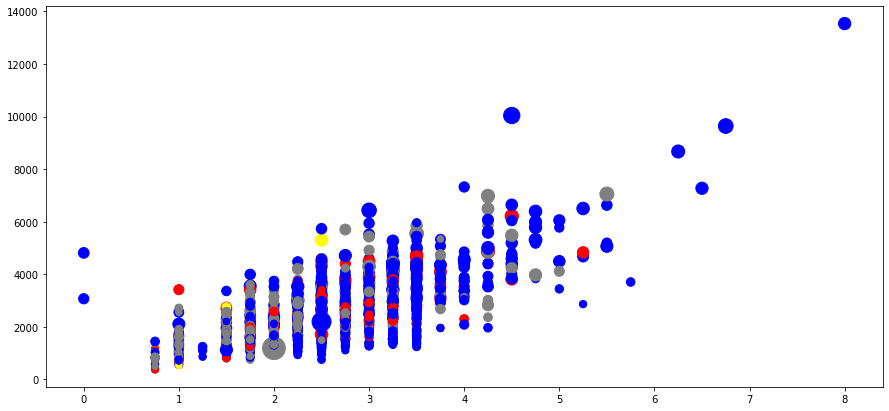

In [25]:
fig , ax = plt.subplots(figsize = (15,7))

x = data['bathrooms']
y = data['sqft_living']

#Podemos modificar el color añadiendolo en C.
color = ['','green','yellow','blue','gray','red']

#Creamos una variable para modificar el tamaño del punto, y la añadimos en s.
vol = np.sqrt(data['price'])/10

ax.scatter(x=x,y=y, s=vol, c=data['condition'].apply(lambda x: color[x]));